<a href="https://colab.research.google.com/github/DikshyaL/Student_Analysis/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Importing the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kayhanh/student-performance-1-million")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'student-performance-1-million' dataset.
Path to dataset files: /kaggle/input/student-performance-1-million


In [45]:
#imports and dataset setting in df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.listdir("/root/.cache/kagglehub/datasets/kayhanh/student-performance-1-million/versions/1")
df = pd.read_csv("/root/.cache/kagglehub/datasets/kayhanh/student-performance-1-million/versions/1/student_performance.csv")
df.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [46]:
#shape = (no_of_rows, no_of_columns)
print("(no_of_rows, no_of_columns)")
df.shape


(no_of_rows, no_of_columns)


(1000000, 6)

In [47]:
#column names
print("the columns present in the dataset")
df.columns

the columns present in the dataset


Index(['student_id', 'weekly_self_study_hours', 'attendance_percentage',
       'class_participation', 'total_score', 'grade'],
      dtype='object')

In [48]:
#for the technical information or details
print("Technical information")
df.info()

Technical information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [49]:
#describe gives statistical summary
print("Statistical summary")
df.describe()

Statistical summary


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278933,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


In [50]:
#total no of null columns or rows

df.isnull().sum()

,0
student_id,0
weekly_self_study_hours,0
attendance_percentage,0
class_participation,0
total_score,0
grade,0


In [51]:
#total no of dublicate rows

df.duplicated().sum()

np.int64(0)

In [52]:
df["grade"].head()
df["grade"].value_counts()


,count
grade,
A,548644
B,258174
C,141980
D,44998
F,6204


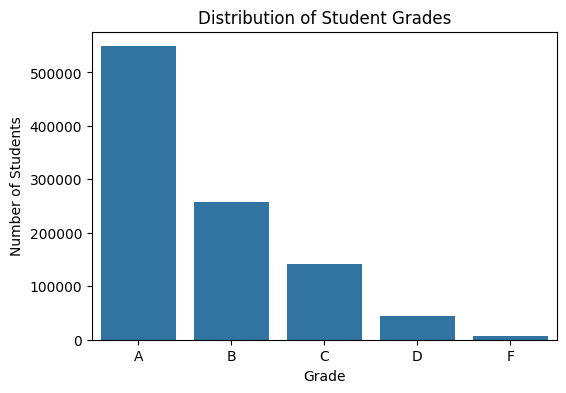

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(x="grade", data = df)
plt.title("Distribution of Student Grades")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

In [55]:

bins = [0, 60, 70, 80, 90, 100]
labels = ["F", "D", "C", "B", "A"]

df["attendance_grade"] = pd.cut(
    df["attendance_percentage"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

df[["attendance_percentage", "attendance_grade"]].head()


,attendance_percentage,attendance_grade
0,95.6,A
1,80.0,C
2,86.3,B
3,70.2,C
4,81.9,B


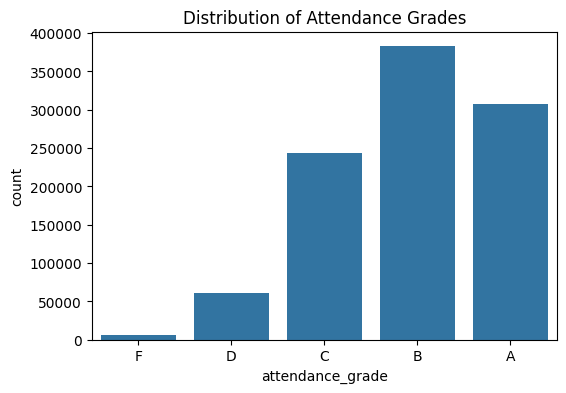

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(x="attendance_grade", data=df)
plt.title("Distribution of Attendance Grades")
plt.show()


In [59]:
bins=[0,5,10,20,30,40]
labels=["F", "D", "C", "B", "A"]

df["weekly_study_grade"]= pd.cut(df["weekly_self_study_hours"], bins=bins, labels=labels , include_lowest= True)
df[["weekly_self_study_hours", "weekly_study_grade"]].head()

,weekly_self_study_hours,weekly_study_grade
0,18.5,C
1,14.0,C
2,19.5,C
3,25.7,B
4,13.4,C


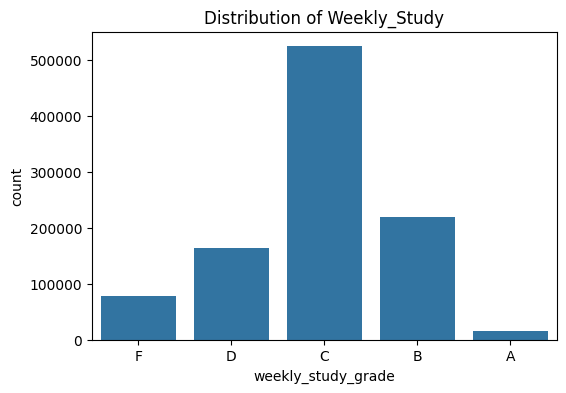

In [61]:
plt.figure(figsize = (6,4))
sns.countplot(x="weekly_study_grade", data = df)
plt.title("Distribution of Weekly_Study")
plt.show()

In [64]:
bins = [0, 6,7,8,9,10]
labels=["F", "D","C","B", "A"]

df["class_participation_grade"] = pd.cut(df["class_participation"],bins= bins, labels= labels, include_lowest= True)

df[["class_participation", "class_participation_grade"]].head()

,class_participation,class_participation_grade
0,3.8,F
1,2.5,F
2,5.3,F
3,7.0,D
4,6.9,D


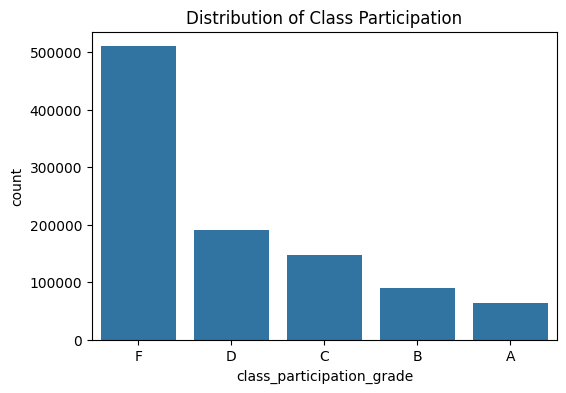

In [66]:
plt.figure(figsize=(6,4))
plt.title("Distribution of Class Participation")
sns.countplot(x="class_participation_grade", data=df)
plt.show()